#### Introduction
* Sequence of operation applied to matrix of input data
* These operation are usually collections of additions & multiplications
* The important trick with neural networks is called 'backpropagation'. Back propagation is a procedure that allows us to update the model variables based on the learning rate and the output of the loss function.
* Another important feature to take note of in neural networks is the non-linear activation function. Since most neural networks are just combinations of addition and multiplication operations, they will not be able to model non-linear datasets. To address this issue, we have used the non-linear activation functions in the neural networks. This will allow the neural network to adapt to most non-linear situations.

In [1]:

#We start off by loading TensorFlow and creating a graph session:

import tensorflow as tf
sess = tf.Session()

In [2]:
#Now, we declare our model variable, input data, and placeholder. 
#We make our input data equal to the value 5, so that the multiplication factor to get 50 will be 10 (that is, 5X10=50):
###We've to learn the value 10


a = tf.Variable(tf.constant(4.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

In [3]:
#Next we add the operation to our computational graph:

multiplication = tf.multiply(a, x_data)

In [4]:
#We will declare the loss function as the L2 distance between the output and the desired target value of 50:

loss = tf.square(tf.subtract(multiplication, 50.))

In [5]:
#Now we initialize our model variable and declare our optimizing algorithm as the standard gradient descent:

init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [6]:
#We can now optimize our model output towards the desired value of 50. 
#We do this by continually feeding in the input value of 5 and back propagating the loss to update the model variable towards the value of 10:


print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
    a_val_old = sess.run(a)
    print(a_val_old)
    sess.run(train_step, feed_dict={x_data: x_val})
    a_val = sess.run(a)
    mult_output = sess.run(multiplication, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' = ' + str(mult_output))

Optimizing a Multiplication Gate Output to 50.
4.0
7.0 * 5.0 = 35.0
7.0
8.5 * 5.0 = 42.5
8.5
9.25 * 5.0 = 46.25
9.25
9.625 * 5.0 = 48.125
9.625
9.8125 * 5.0 = 49.0625
9.8125
9.90625 * 5.0 = 49.53125
9.90625
9.953125 * 5.0 = 49.765625
9.953125
9.9765625 * 5.0 = 49.882812
9.9765625
9.988281 * 5.0 = 49.941406
9.988281
9.994141 * 5.0 = 49.970703


#### We will do the same for f(x)= a.x + b

In [7]:
#We will start in exactly same way as the preceding example, except now we'll initialize two model variables, a and b:

from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [8]:
#Initialize two model variables a,b
a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))

In [9]:
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

In [10]:
two_gate = tf.add(tf.multiply(a,x_data),b)

In [12]:
loss = tf.square(tf.subtract(two_gate,50))

In [13]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [14]:
init = tf.global_variables_initializer()

In [18]:
sess=tf.Session()
sess.run(init)

In [19]:

#We now optimize the model variables to train the output towards the target value of 50:

print('\nOptimizing Two Gate Output to 50.')
for i in range(10):
    # Run the train step
    print(a_val)
    print(b_val)
    sess.run(train_step, feed_dict={x_data: x_val})
    # Get the a and b values
    a_val, b_val = (sess.run(a), sess.run(b))
    # Run the two-gate graph output
    two_gate_output = sess.run(two_gate, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' + ' + str(b_val) + ' = ' + str(two_gate_output))


Optimizing Two Gate Output to 50.
9.4615345
2.6923068
5.4 * 5.0 + 1.88 = 28.88
5.4
1.88
7.512 * 5.0 + 2.3024 = 39.8624
7.512
2.3024
8.52576 * 5.0 + 2.5051522 = 45.133953
8.52576
2.5051522
9.012364 * 5.0 + 2.6024733 = 47.664295
9.012364
2.6024733
9.2459345 * 5.0 + 2.6491873 = 48.87886
9.2459345
2.6491873
9.358048 * 5.0 + 2.67161 = 49.461853
9.358048
2.67161
9.411863 * 5.0 + 2.682373 = 49.74169
9.411863
2.682373
9.437695 * 5.0 + 2.687539 = 49.87601
9.437695
2.687539
9.450093 * 5.0 + 2.690019 = 49.940483
9.450093
2.690019
9.456045 * 5.0 + 2.6912093 = 49.971436


#### Working with Gates and Activation Functions


In [48]:
import numpy as np
import matplotlib.pyplot as plt
ops.reset_default_graph()
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)


In [49]:

batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))    ###Why b1,b2 taken from random uniform distribution?
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)  ###Mean 2 and std .1 and 500 values
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [50]:
x

array([2.04967142, 1.98617357, 2.06476885, 2.15230299, 1.97658466,
       1.9765863 , 2.15792128, 2.07674347, 1.95305256, 2.054256  ,
       1.95365823, 1.95342702, 2.02419623, 1.80867198, 1.82750822,
       1.94377125, 1.89871689, 2.03142473, 1.90919759, 1.85876963,
       2.14656488, 1.97742237, 2.00675282, 1.85752518, 1.94556173,
       2.01109226, 1.88490064, 2.0375698 , 1.93993613, 1.97083063,
       1.93982934, 2.18522782, 1.99865028, 1.89422891, 2.08225449,
       1.87791564, 2.02088636, 1.80403299, 1.8671814 , 2.01968612,
       2.07384666, 2.01713683, 1.98843517, 1.96988963, 1.8521478 ,
       1.92801558, 1.95393612, 2.10571222, 2.03436183, 1.82369598,
       2.0324084 , 1.96149177, 1.9323078 , 2.06116763, 2.10309995,
       2.09312801, 1.91607825, 1.96907876, 2.03312634, 2.09755451,
       1.95208258, 1.9814341 , 1.8893665 , 1.88037934, 2.08125258,
       2.135624  , 1.99279899, 2.10035329, 2.0361636 , 1.93548802,
       2.03613956, 2.15380366, 1.9964174 , 2.15646437, 1.73802

In [51]:
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))  

relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [52]:
# Declare the loss function as the difference between
# the output and a target value, 0.75.
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [53]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [54]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

In [55]:

# Run loop across gate
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
for i in range(500):
    rand_indices = np.random.choice(len(x), size=batch_size)
    
    x_vals = np.transpose([x[rand_indices]])
    
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))    
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals}))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(sigmoid_output)) + ' relu = ' + str(np.mean(relu_output)))


Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.12655206 relu = 2.0227606
sigmoid = 0.17863758 relu = 0.7530296
sigmoid = 0.24769813 relu = 0.7492897
sigmoid = 0.3446748 relu = 0.7499546
sigmoid = 0.4400661 relu = 0.7539999
sigmoid = 0.5236898 relu = 0.754772
sigmoid = 0.58373857 relu = 0.7508698
sigmoid = 0.62733483 relu = 0.7470234
sigmoid = 0.6549499 relu = 0.75180537
sigmoid = 0.67452586 relu = 0.75470716


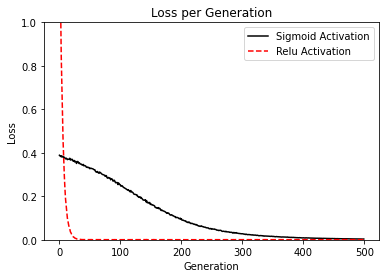

In [56]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### Implementing a One-Layer Neural Network

In [177]:
from sklearn import datasets

In [178]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [179]:
sess = tf.Session()

In [180]:
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

In [181]:
y_vals

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [182]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [183]:

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)

test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [184]:
test_indices

array([  4,   7, 137,  15, 145,  22,  31,  33,  37,  38,  43,  46,  47,
        51,  58,  63,  67,  68,  69,  70,  72,  75,  88,  95, 102, 103,
       104, 107, 116, 124])

In [185]:
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]



In [186]:
#Converting data in range of 0 - 1
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [187]:

batch_size = 50
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

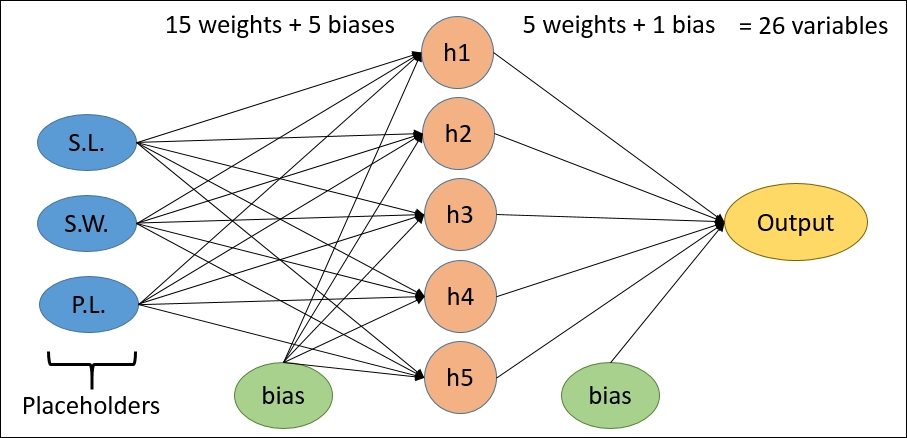

In [188]:
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [189]:
hidden_output = tf.sigmoid(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.sigmoid(tf.add(tf.matmul(hidden_output, A2),b2))

In [190]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [191]:

my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)
sess = tf.Session()
init = tf.global_variables_initializer()

sess.run(init)

In [192]:

# First we initialize the loss vectors for storage.
loss_vec = []  ##For train loss
test_loss = []
for i in range(500):
    # First we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    # Now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    # We save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))

    # Finally, we run the test-set loss and save it.
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Train Loss = ' + str(temp_loss))
        #print('Generation: ' + str(i+1) + '. Test Loss = ' + str(test_temp_loss))
        

Generation: 50. Train Loss = 1.9394649
Generation: 100. Train Loss = 1.6538812
Generation: 150. Train Loss = 1.9916892
Generation: 200. Train Loss = 1.6371963
Generation: 250. Train Loss = 1.3208265
Generation: 300. Train Loss = 1.7094983
Generation: 350. Train Loss = 0.92208105
Generation: 400. Train Loss = 0.72911674
Generation: 450. Train Loss = 0.9537544
Generation: 500. Train Loss = 0.8195313


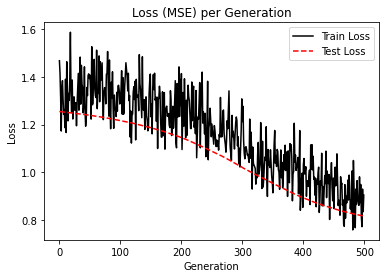

In [193]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()